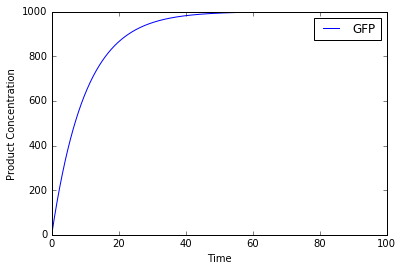

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import least_squares
  
def simulation_set_of_equations(y, t, *args):
    k_express = args[0] # A summation of transcription and translation
    k_loss = args[1] # A summation of dilution and degredation
    
    GFP = y
    
    dGFP = k_express - GFP*k_loss
    
    return dGFP
 
# Parameters MM
k_express = 100
k_loss = 0.1
params = (k_express, k_loss)
 
# Initial Conditions MM
init_P = [0]
  
# Timesteps
n_steps = 1000 #fineness of timesteps
t = np.linspace(0, 100, n_steps) 
  
num_P = odeint(simulation_set_of_equations, init_P, t, args = (params))
plt.plot(t, num_P, c='b', label = 'GFP')
plt.xlabel('Time')
plt.ylabel('Product Concentration')
plt.legend(loc = 'best')
plt.show()

[  9.79102206e+01   9.75269615e-02]


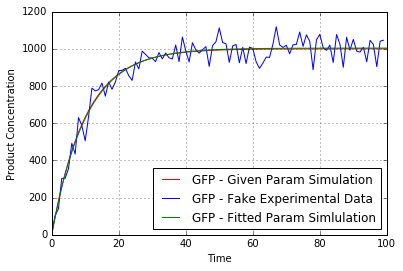

In [22]:
noise = np.random.normal(0, 50, num_P.shape)
exp_P = num_P + noise
exp_t = t[::10]
exp_P = exp_P[::10]
# Create experimental data. Just take the regular simulation data and add some gaussian noise to it.

def residuals(p):
    p = tuple(p)
    sim_P = odeint(simulation_set_of_equations, init_P, exp_t, args = p)
    res = sim_P - exp_P
    return res.flatten()

initial_guess = (100, 100)
low_bounds = [0, 0]
up_bounds = [1000, 1000]
fitted_params = least_squares(residuals, initial_guess, bounds=(low_bounds, up_bounds)).x
# With least_squares function, unlike, say, curve_fit, it does not compute the covariance matrix for you
# TODO calculate standard deviation of paramater estimation 
# (will this ever be used other than sanity checking?)
print(fitted_params)

plt.plot(t, odeint(simulation_set_of_equations, init_P, t, args = tuple(params))[:,0], c='r', label='GFP - Given Param Simulation')
plt.plot(exp_t, exp_P[:,0], c='b', label='GFP - Fake Experimental Data')
plt.plot(t, odeint(simulation_set_of_equations, init_P, t, args = tuple(fitted_params))[:,0], c='g', label='GFP - Fitted Param Simlulation')
plt.legend(loc = 'best')
plt.xlabel('Time')
plt.ylabel('Product Concentration')
plt.grid()
plt.show()